- (c) Ken-ichi Fukui, 2025/01/04
- MIT License

## 多層パーセプトロンによる手書き文字認識
- MLP Classifier
    - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ValidationCurveDisplay, LearningCurveDisplay
from sklearn.datasets import fetch_openml

In [2]:
# openmlからMNISTデータをダウンロード
X_all, y_all = fetch_openml('mnist_784', return_X_y=True, parser='auto')

# 最初の2000点のみ使用する
X, y = X_all[:2000], y_all[:2000].astype(int)

### PCAによる次元圧縮

In [3]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

### 多層パーセプトロン(MLP)の学習と評価

In [4]:
mlp = MLPClassifier(
        hidden_layer_sizes=(100,), #隠れ層のノード数
        validation_fraction=0.1,   #検証データの割合
        early_stopping=True,       #早期停止の設定
        n_iter_no_change=20        #早期停止の停滞上限
)
mlp.fit(X_pca, y)
acc_trn = mlp.score(X_pca, y)
print(acc_trn)

0.9185


### 損失関数の学習曲線の描画

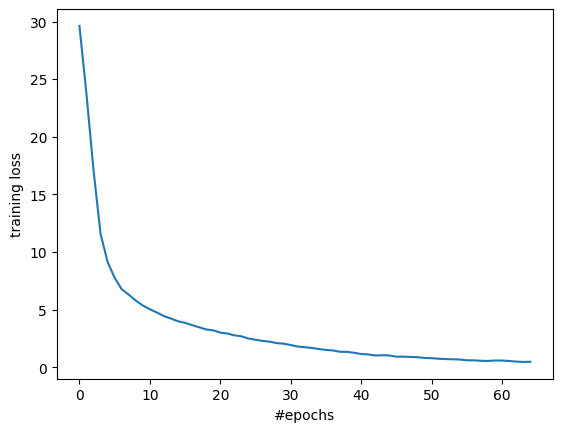

In [5]:
plt.plot(mlp.loss_curve_)
plt.xlabel("#epochs")
plt.ylabel("training loss")
plt.show()

### 検証データに対するAccuracyの学習曲線をプロット

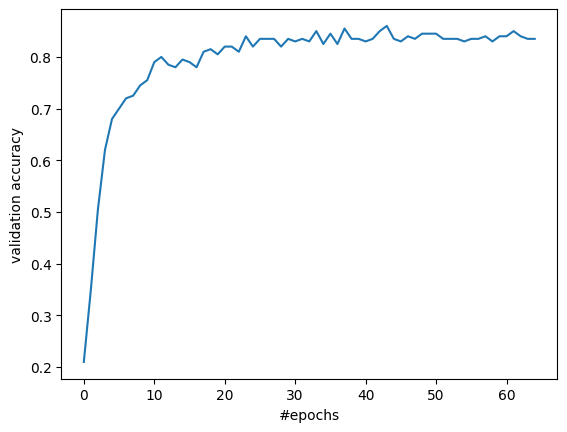

In [6]:
plt.plot(mlp.validation_scores_)
plt.xlabel("#epochs")
plt.ylabel("validation accuracy")
plt.show()

### クロスバリデーションによる評価

In [8]:
scores = cross_validate(mlp, X_pca, y, cv=10, return_train_score=True)
print("Ave. Training data accuracy: {:.3f}".format(np.average(scores['train_score'])))
print("Ave. Test data accuracy: {:.3f}".format(np.average(scores['test_score'])))

Ave. Training data accuracy: 0.915
Ave. Test data accuracy: 0.810
